In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("NID_data.csv")
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


# A1

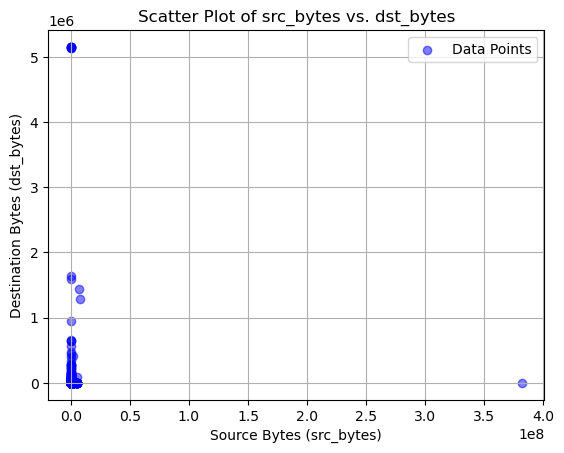

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

feature_A = data['src_bytes']
feature_B = data['dst_bytes']

plt.scatter(feature_A, feature_B, alpha=0.5, c='b', label='Data Points')
plt.xlabel("Source Bytes (src_bytes)")
plt.ylabel("Destination Bytes (dst_bytes)")
plt.title("Scatter Plot of src_bytes vs. dst_bytes")

plt.legend()
plt.grid(True)
plt.show()


# A2

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['count']]  
y = data['dst_host_count']   
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 7584.0959



# A3



# Parameters:

Fit_intercept (default=True): This parameter determines whether or not the model should fit an intercept term (bias). If set to False, the model assumes the data is already centered.

Normalize (default=False): If fit_intercept is True, this parameter specifies whether the features should be normalized (scaled) before fitting the model. It can be useful when you have features on different scales.
    
# Attributes:

Coefficients (coef_): The coefficients represent the weights assigned to each independent variable in the linear equation. They show the strength and direction of the relationship between each independent variable and the dependent variable.

Intercept (intercept_): This attribute holds the intercept term (bias) of the linear regression equation. It represents the predicted value of the dependent variable when all independent variables are set to zero.

Rank (rank_): The rank of the matrix X, which is used to solve the linear regression problem. It is the number of linearly independent features.

Singular values (singular_): The singular values of the design matrix. They are used in the computation of the condition number of X.

Residuals (residues_): The difference between the actual target values and the predicted values for the training data. It provides information about the model's accuracy on the training dataset.

Coefficient of determination (R-squared, score): This metric measures the proportion of the variance in the dependent variable that is explained by the independent variables. A higher R-squared value indicates a better fit of the model to the data.

Mean squared error (MSE): MSE measures the average squared difference between the actual and predicted values. Lower MSE values indicate a better fit.

Root mean squared error (RMSE): RMSE is the square root of the MSE and provides an interpretable measure of the average error in the same units as the dependent variable.

Residual standard error (RSE): It is an estimate of the standard deviation of the residuals and provides a measure of the overall model fit.

Standard errors of coefficients (std_err): These values represent the standard errors of the estimated coefficients, indicating the uncertainty in the coefficient estimates.

t-statistics (t-values): These values indicate how many standard errors the estimated coefficients are away from zero. Large absolute t-values suggest significant predictors.

p-values: The p-values associated with each coefficient test the null hypothesis that a particular coefficient is not significant. Smaller p-values indicate more significant predictors.

# A4

In [7]:
features = data.loc[: , 'duration' : 'dst_host_srv_rerror_rate']
labels = data.loc[: , ['class']]
 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score as acs
 
X_train, X_test, y_train, y_test = tts(features, labels, test_size=0.2, random_state=42)
 
categ_var_train = X_train.select_dtypes(include=['object'])
categ_var_test = X_test.select_dtypes(include=['object'])
 
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
 
for col in categ_var_train:
    X_train[col] = label_encoder.fit_transform(X_train[col])
for col in categ_var_test:
    X_test[col] = label_encoder.fit_transform(X_test[col])
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=100)
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

C:\Users\Sanjana Chowdary\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on the test set: 0.8964080174637825


# A5

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('NID_data.csv')

X = data[['duration', 'src_bytes']]  
y = data['dst_bytes']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions_tree = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_predictions_tree)
tree_mse = mean_squared_error(y_test, tree_predictions_tree)

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)
knn_predictions_knn = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions_knn)
knn_mse = mean_squared_error(y_test, knn_predictions_knn)

print("Regression Tree MAE:", tree_mae)
print("Regression Tree MSE:", tree_mse)
print("k-NN Regressor MAE:", knn_mae)
print("k-NN Regressor MSE:", knn_mse)


Regression Tree MAE: 2980.8294187015244
Regression Tree MSE: 1313429262.940895
k-NN Regressor MAE: 4599.733359793609
k-NN Regressor MSE: 8592587317.474293
